In [1]:
#Pytorch computer vision

#0.Computer vision libaries in Pytorch

#'torchvision' -base domain library for  Pytorch computer vision. look the resoource online
#torchvision.datasets - get the datasets and data loading functions for computer vision here
#torchvision.models - get pretrained computer vision models that you can leverage for your own problems
#torchvision.transforms - functionsfor manipulating your vision data(images) to be suitable for use with an ML model
#torch.utils.data.Dataset - Base dataset class for pyTorch
#torch.utils.data.DataLoader - Create a python iterable over a dataset



In [2]:
import torch
from torch import nn

#Import torchvision
import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor

#Imprt matpotlib for visualization

import matplotlib.pyplot as plt

#check versions
print(torch.__version__)
print(torchvision.__version__)

2.5.1+cu124
0.20.1+cu124


# 1.Getting the datasets

In [3]:
# We are using fashion MNIST dataset

#Setup Training data
from torchvision import datasets
train_data = datasets.FashionMNIST(
    root="data", #where to download data to
    train = True, #we want the training datasets
    download=True,
    transform=ToTensor(), # How do we want ot transform the data
    target_transform=None #how do we want to tranfrom the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform= ToTensor(),
    target_transform=None

)

100%|██████████| 26.4M/26.4M [00:02<00:00, 11.1MB/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29.5k/29.5k [00:00<00:00, 176kB/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4.42M/4.42M [00:01<00:00, 3.18MB/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5.15k/5.15k [00:00<00:00, 2.72MB/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



In [4]:
len(train_data), len(test_data)

(60000, 10000)

In [5]:
#See First training example
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [6]:
class_names = train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [7]:
class_to_idx = train_data.class_to_idx
class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [8]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

#1.1 Check input and output shapes of data

In [9]:
#Check the shape of our image
# In pyTorch color channel starts first other decalre at the last
print(f"image shape:{image.shape}->[color_channels, height, width]"),
print(f"Image label:{class_names[label]}")

image shape:torch.Size([1, 28, 28])->[color_channels, height, width]
Image label:Ankle boot


 ## 1.2 Visualize our data

Image shape:torch.Size([1, 28, 28])


Text(0.5, 1.0, '9')

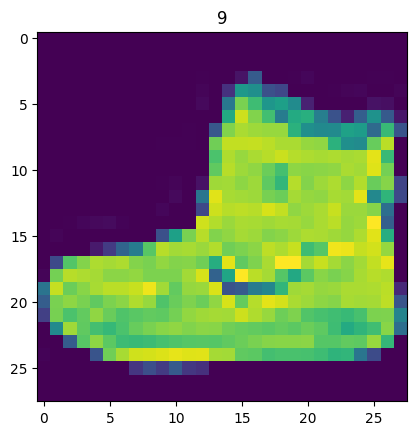

In [10]:
import matplotlib.pyplot as plt
image, label = train_data[0]

print(f"Image shape:{image.shape}")
plt.imshow(image.squeeze()) #we are parsing the image in matplotlib
plt.title(label) # if we are printing the label 9 it would show Ankle boot from above output list

(-0.5, 27.5, 27.5, -0.5)

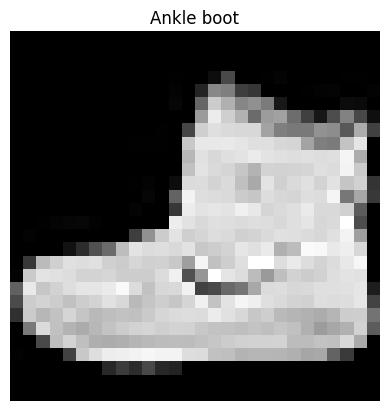

In [11]:
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)

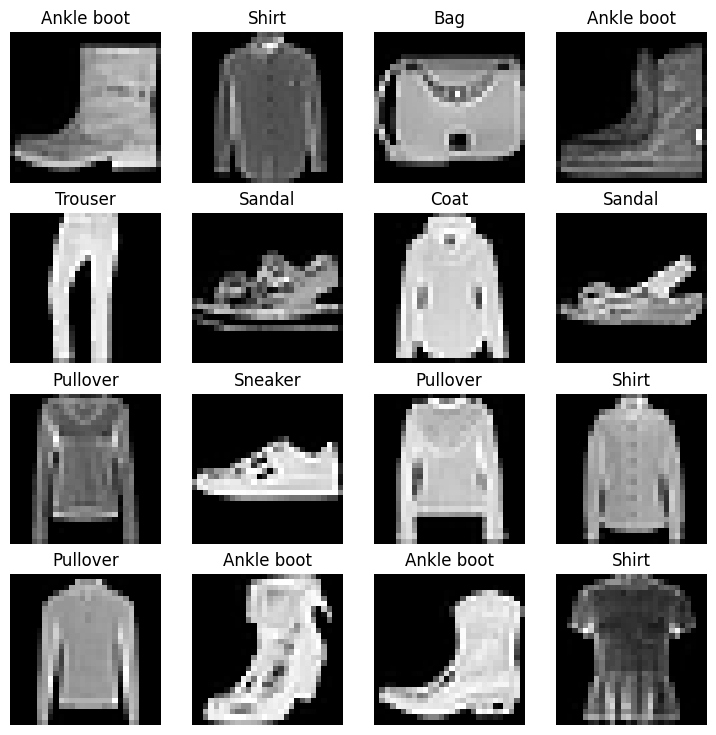

In [12]:
# Plot random more images
torch.manual_seed(42) # as we are mentioning manual seed it will give us same ouput in number. Let says if we comment it will give random numbers
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
  #print(i) this will print 16 images
  random_idx = torch.randint(0,len(train_data), size=[1]).item()
  #print(random_idx) to see the image number in same or random
  img, label = train_data[random_idx]
  fig.add_subplot(rows, cols,i)
  plt.imshow(img.squeeze(),cmap="gray")
  plt.title(class_names[label])
  plt.axis(False)

In [13]:
# jus checking if the clothing(images) could be modelled with puer linear lines? or non-linearities?

In [14]:
train_data, test_data

(Dataset FashionMNIST
     Number of datapoints: 60000
     Root location: data
     Split: Train
     StandardTransform
 Transform: ToTensor(),
 Dataset FashionMNIST
     Number of datapoints: 10000
     Root location: data
     Split: Test
     StandardTransform
 Transform: ToTensor())

#2. Prepare DataLoader

# So right now our data is in the form of PyTorch Datasets. we can see the output above for dataset

#DataLoader turns our datasets into a Pythoin iterable

# more specifically, we want to turn our data into mini batchs

# Why would we do this?
#1. It is more computaitonally efficient, as in computing hardware may not be able to look(store in memory) at 60000 images in one hit. So we break it down to 32 images at a time(batch size of 32)
#2. It gives our neurak network more chances to update its gradients per epoch.
# watch details more about mini bathce: Watch the video on YT from andrew ng- Mini batch gradient descent



In [15]:
from torch.utils.data import DataLoader # this Dataloader is also used for not only for image, but also text, audio and all

# Setup  the batch size hyperparamter
BATCH_SIZE = 32

# Turn datasets into iterables(batches)
train_dataloader = DataLoader(dataset= train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True)

test_dataloader = DataLoader(dataset=test_data,
                             batch_size=BATCH_SIZE,
                             shuffle=False) #we are not shuffing the test_data, to set the data in same order so that we are not shuffleing

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x78398fc28cd0>,
 <torch.utils.data.dataloader.DataLoader at 0x78398d95f310>)

In [16]:
#Let the check the data we have created so far
print(f"DataLoader:{train_dataloader,test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}..")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}..")



DataLoader:(<torch.utils.data.dataloader.DataLoader object at 0x78398fc28cd0>, <torch.utils.data.dataloader.DataLoader object at 0x78398d95f310>)
Length of train_dataloader: 1875 batches of 32..
Length of test_dataloader: 313 batches of 32..


In [17]:
# so we are dividing 60000 data to 30
60000/32 # so it would give 1875 above for train data and same thing for test it would say 313

1875.0

In [18]:
# Check out whats inside the training data
train_features_batch, train_labels_batch = next(iter(train_dataloader)) # we gonna iter the dataloader
train_features_batch.shape, train_labels_batch.shape
# in the output you would see 32 is the batch size, 1 is color channel, 28 this is height, 28 this is width
# also need to note this color channels, height and width change as per the size of the image and color

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size:torch.Size([1, 28, 28])
Label:8, lable size: torch.Size([])


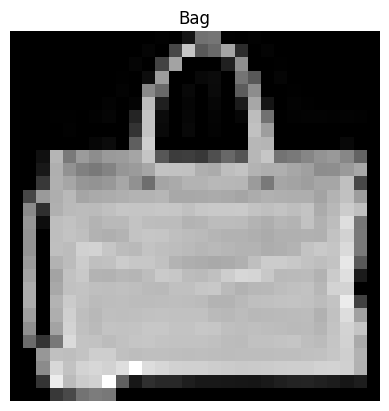

In [19]:
# SHow a sample

#torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size:{img.shape}")
print(f"Label:{label}, lable size: {label.shape}")

# 3. Model 0: Build a baseline model

When starting to build a series of machine learing modelling experiments, it's best practice to start with baseline model

A baseline model is a simpe model you will try and imrove upon with subseqent models/experiments


In other words: start simply and add complexity when necessary.

In [20]:
# Create a flatten layer
flatten_model = nn.Flatten()

# Get a single sample
x  = train_features_batch[0]
x.shape


#Flatten the sample
output = flatten_model(x) #perform forward pass

#Print what is happening
print(f"Shape before flattening: {x.shape} -> [color-channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]") #below output we are getting 784 from multiplying it with 28*28=784

# here we are converting 28*28=784 to a single pixel to classify and identify the image

Shape before flattening: torch.Size([1, 28, 28]) -> [color-channels, height, width]
Shape after flattening: torch.Size([1, 784]) -> [color_channels, height*width]


In [21]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
  def __init__(self,
            input_shape: int,
            hidden_units: int,
            output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(  # anything we are putting in Sequential it will goes layer by layer init
            nn.Flatten(),
            nn.Linear(in_features=input_shape,
                      out_features=hidden_units),
            nn.Linear(in_features=hidden_units,
                      out_features=output_shape)
        )
  def forward(self, x):
    return self.layer_stack(x)

In [22]:
torch.manual_seed(42)

#Setup model with input parameters
model_0 = FashionMNISTModelV0(
    input_shape=784, #this came from 28*28
    hidden_units=10, #how many units in the hidden layer
    output_shape=len(class_names) #one of every class
).to("cpu")

model_0

FashionMNISTModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=784, out_features=10, bias=True)
    (2): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [23]:
#here we have created a dummy data to see if model shape is correct
dummy_x = torch.rand([1,1,28,28])
model_0(dummy_x)

tensor([[-0.0315,  0.3171,  0.0531, -0.2525,  0.5959,  0.2112,  0.3233,  0.2694,
         -0.1004,  0.0157]], grad_fn=<AddmmBackward0>)

In [24]:
model_0.state_dict()

OrderedDict([('layer_stack.1.weight',
              tensor([[ 0.0273,  0.0296, -0.0084,  ..., -0.0142,  0.0093,  0.0135],
                      [-0.0188, -0.0354,  0.0187,  ..., -0.0106, -0.0001,  0.0115],
                      [-0.0008,  0.0017,  0.0045,  ..., -0.0127, -0.0188,  0.0059],
                      ...,
                      [-0.0116,  0.0273, -0.0344,  ...,  0.0176,  0.0283, -0.0011],
                      [-0.0230,  0.0257,  0.0291,  ..., -0.0187, -0.0087,  0.0001],
                      [ 0.0176, -0.0147,  0.0053,  ..., -0.0336, -0.0221,  0.0205]])),
             ('layer_stack.1.bias',
              tensor([-0.0093,  0.0283, -0.0033,  0.0255,  0.0017,  0.0037, -0.0302, -0.0123,
                       0.0018,  0.0163])),
             ('layer_stack.2.weight',
              tensor([[ 0.0614, -0.0687,  0.0021,  0.2718,  0.2109,  0.1079, -0.2279, -0.1063,
                        0.2019,  0.2847],
                      [-0.1495,  0.1344, -0.0740,  0.2006, -0.0475, -0.2514, -0.

#3.1 Setuup loss, optimizer and evaluation metrics

Loss function: since we are working with multi-class data, out loss function will be nn.CrossEntropyLoss()

Optimizer: torch.optim.SGD()

Evaluation metric: since we working on a classification problem will use accuracy as out evaluation metric


In [25]:
import requests
from pathlib import Path

#Download helper functions from learn PyTorch repo
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download..")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/refs/heads/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f: # if we have this helper functions it will help us to import the accuracy_fn easily
    f.write(request.content)

In [26]:
# Import accuracy metric
from helper_functions import accuracy_fn

#Setup loss function and optimizer

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)

#3.2 Creating a function to time our experiments

Two of the main things you will often to track:
1.Model's performance (loss and accuracy values etc)
2.How fast it runs

In [27]:
from timeit import default_timer as Timer
def print_train_time(start:float,
                     end:float,
                     device:torch.device = None):
  """Prints difference between start and end time"""
  total_time = end - start
  print(f"Train time on{device}:{total_time:.3f}seconds")
  return total_time

In [28]:
start_time = Timer()
#code......

end_time = Timer()

print_train_time(start=start_time, end=end_time, device = "cpu")

Train time oncpu:0.000seconds


4.5174999996788756e-05

In [29]:
#3.3 Creating a trainning loop and training a model on batches of data.....
#highlight that the optimizer will update parameters once per batch rather than once per epoch...


# 3.3 Creating a trainning loop and training a model on batches of data
1. Loop through epochs
2. Loop through training batches, perform trainning steps, calculate the train loss per batch
3. Loop through testing batches, perform testing steps, calculate the test loss per batch.
4. Print out what is happening
5. Time it all.



In [30]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

#set the seed and start the timer

torch.manual_seed(42)
train_time_start_on_cpu = Timer()

#Set the number of epochs(will keep this small for faster training time)
epochs = 3 #this will run of about 30sec


#Create training and test loop
for epoch in tqdm(range(epochs)):
  print(f"Epoch: {epoch}\n----")
  ##Training
  train_loss = 0
  #Add a loop through the training batches
  for batch,(X,y) in enumerate(train_dataloader): #Here X is an images and y is an labels
    model_0.train()

    #1.Forward pass
    y_pred = model_0(X)

    #2. Calculate the loss per batch
    loss = loss_fn(y_pred, y)
    train_loss += loss #accumate train loss

    #3.Optimizer zero grad
    optimizer.zero_grad()

    #4. Loss backward
    loss.backward()

    #5. Optimizer step
    optimizer.step() # we are updating model parameters once per batch

    # Print out what is happening
    if batch % 400 == 0:
      print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")


  #Divide total train loss by lentgh of train dataloader
  train_loss /= len(train_dataloader)


  ##Testing
  test_loss, test_acc = 0,0
  model_0.eval()
  with torch.inference_mode():
    for X_test, y_test in test_dataloader:
      # 1 . Forward pass
      test_pred = model_0(X_test)

      #2. Calculate the loss(accumulatively)
      test_loss += loss_fn(test_pred, y_test)

      #3. Calculate accuracy
      test_acc += accuracy_fn(y_true=y_test, y_pred=test_pred.argmax(dim=1)) # we are compare with label with label here

    #Calucate the test loss average per batch
    test_loss /= len(test_data)

    #Calculate the test acc average per batch
    test_acc /= len(test_dataloader)

  #Print out


  print(f"\n Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}. Test acc:{test_acc:.4f}")


#Calculate the training time

train_time_end_on_cpu = Timer()
total_train_time_model_0 = print_train_time(start= train_time_start_on_cpu,
                                            end = train_time_end_on_cpu,
                                            device=str(next(model_0.parameters()).device))

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.5904 | Test loss: 0.0159. Test acc:82.0387
Epoch: 1
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.4763 | Test loss: 0.0150. Test acc:83.1969
Epoch: 2
----
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.

 Train loss: 0.4550 | Test loss: 0.0149. Test acc:83.4265
Train time oncpu:32.649seconds


In [31]:
next(model_0.parameters())

Parameter containing:
tensor([[ 0.0273,  0.0298, -0.0065,  ...,  0.0071,  0.0091,  0.0170],
        [-0.0189, -0.0355,  0.0155,  ...,  0.0161,  0.0120,  0.0117],
        [-0.0008,  0.0020,  0.0032,  ...,  0.0058, -0.0146,  0.0084],
        ...,
        [-0.0116,  0.0274, -0.0323,  ...,  0.0527,  0.0434,  0.0006],
        [-0.0231,  0.0252,  0.0236,  ..., -0.0892, -0.0385, -0.0071],
        [ 0.0175, -0.0148,  0.0027,  ..., -0.1155, -0.0674,  0.0125]],
       requires_grad=True)

In [32]:
#4. Make predictions and get Model 0 Results
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn):
  """Return a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader): #tqdm is for progress bar below in the output
      #Make predictions with the model
      y_pred = model(X)

      #Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    #Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, #only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}

#Calculated model 0 results on the test dataset
model_0_results = eval_model(model=model_0,
                               data_loader=test_dataloader,
                               loss_fn=loss_fn,
                               accuracy_fn=accuracy_fn)
model_0_results


  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

###5. Setup device agnotic-code(for using aGPU if there one)



In [33]:
!nvidia-smi

Mon Feb  3 01:10:32 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   47C    P8             12W /   70W |       2MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [34]:
#Setup device-agnostice code

import torch
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

##6  Model 1: Building a better model with non-linearity

we learned about the power of non-linearity in notebook 02

In [35]:
# Create a model with non-linear and linear layers
class FashionMNISTModelV1(nn.Module):
  def __init__(self,
               input_shape:int,
               hidden_units:int,
               output_shape:int):
    super().__init__()
    self.layer_stack = nn.Sequential(
        nn.Flatten(), #Flatten inputs into a single vector
        nn.Linear(in_features=input_shape,
                  out_features = hidden_units),

        nn.ReLU(),
        nn.Linear(in_features=hidden_units, # here we are mentioning the hidden_units as we need to match with out_features from above as it has hidden_units
                  out_features=output_shape),

        nn.ReLU()

    )

  def forward(self, x: torch.Tensor):
    return self.layer_stack(x)



In [36]:
next(model_0.parameters()).device

device(type='cpu')

In [37]:
#Create an instance of model_1
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=784, #this is the putput of the flatten after out 28-28 images goes in
                              hidden_units=10,
                              output_shape=len(class_names)).to(device) #send to the GPU if it's avaiable
next(model_1.parameters()).device

#Below index 0 means that we are using first gpu which is avaiable

device(type='cuda', index=0)

#6.1 Setup loss, optimizer and evaluation metrics

In [38]:
from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss() #measure how wrong our model is
optimizer = torch.optim.SGD(params=model_1.parameters(), #tries to update our model parameters to reduce the loss
                            lr=0.1)

#6.2 Functionizing training  and evalution/testing loop
create the function for:
1 training loop- 'train_step()'
2 testing loop- 'test_step()'

In [39]:
def train_step(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               accuracy_fn,
               device:torch.device = device):
    """Performs a training with model tring to learn on data loader"""
    train_loss, train_acc=0,0

  #put model into training mode
    model.train()

  #Add a loop through the training batches
    for batch,(X,y) in enumerate(data_loader): #Here X is an images and y is an labels
      #put data on target device
      X, y = X.to(device), y.to(device)

    #1.Forward pass (ouputs the raw logits from the model)
      y_pred = model(X)

    #2. Calculate the loss per batch
      loss = loss_fn(y_pred, y)
      train_loss += loss #accumate train loss
      train_acc += accuracy_fn(y_true=y,
                               y_pred=y_pred.argmax(dim=1)) #go from logits -> predicition labels


    #3.Optimizer zero grad
      optimizer.zero_grad()

    #4. Loss backward
      loss.backward()

    #5. Optimizer step
      optimizer.step() # we are updating model parameters once per batch

    # Print out what is happening
      if batch % 400 == 0:
        print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples.")


  #Divide total train loss and acc by lentgh of train dataloader
    train_loss /= len(train_dataloader)
    train_acc /= len(data_loader)
    print(f"Train loss: {test_loss:5f} | Train acc:{train_acc:.2f}%")


In [40]:
def test_step(model: torch.nn.Module,
              data_loader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module,
              accuracy_fn, # we are not optimizing in test loop we are just evaluating
              device: torch.device = device):
  """"Performs a testing loop step on model going over data_loader"""

  test_loss, test_acc =0,0
  #put the model in eval model
  model.eval()

  #Turn on inference mode context manager
  with torch.inference_mode():
    for X,y in data_loader:
      #Send the data to target device
      X, y = X.to(device), y.to(device)

      #1. Forward pass
      test_pred = model(X)

      #2. Calculate the loss/acc
      test_loss += loss_fn(test_pred,y)
      test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) #go from logits -> prediction labels

    #Adjust metrics and print out
    test_loss /= len(data_loader)
    test_acc /= len(data_loader)
    print(f"Test loss:{test_loss:.5f} | Test acc: {test_acc:.2f}%\n")


In [41]:
torch.manual_seed(42)

#Measyre time
from timeit import default_timer as Timer
train_time_start_on_gpu = Timer()


#Set epochs
epochs = 3

#Create a optimization and evaluation loop using train_step() and test_step
for epoch in tqdm(range(epochs)):
  print(f"Ëpoch: {epoch}\n---------")
  train_step(model=model_1,
             data_loader=train_dataloader,
             loss_fn=loss_fn,
             optimizer=optimizer,
             accuracy_fn=accuracy_fn,
             device=device)

  test_step(model=model_1,
            data_loader=test_dataloader,
            loss_fn=loss_fn,
            accuracy_fn=accuracy_fn,
            device=device)

train_time_end_on_gpu =Timer()
total_train_time_model_1 = print_train_time(start= train_time_start_on_gpu,
                                            end=train_time_end_on_gpu,
                                            device=device)

  0%|          | 0/3 [00:00<?, ?it/s]

Ëpoch: 0
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.014919 | Train acc:61.34%
Test loss:0.95636 | Test acc: 65.00%

Ëpoch: 1
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.014919 | Train acc:71.93%
Test loss:0.72227 | Test acc: 73.91%

Ëpoch: 2
---------
Looked at 0/60000 samples.
Looked at 12800/60000 samples.
Looked at 25600/60000 samples.
Looked at 38400/60000 samples.
Looked at 51200/60000 samples.
Train loss: 0.014919 | Train acc:75.94%
Test loss:0.68500 | Test acc: 75.02%

Train time oncuda:28.229seconds


In [42]:
#Note: Sometimes, depending on your data/hardware you might find thr cpu is faster than the gpu.
# 1. It could be that overhead for copying  data/model to and from the GPU outweighs the compute benefits offered by the GPU.
#2. the hardware we are using has a better CPU in terms of computer capability than the GPU.
# to make computer faster for the model see this:  https://horace.io/brrr_intro.html

In [43]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

In [44]:
#this is using cpu
total_train_time_model_0

32.64874867100002

In [45]:
!nvidia-smi

Mon Feb  3 01:11:01 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   52C    P0             30W /   70W |     158MiB /  15360MiB |      4%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [46]:
#4. Make predictions and get Model 0 Results
torch.manual_seed(42)
def eval_model(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device=device):
  """Return a dictionary containing the results of model predicting on data_loader"""
  loss, acc = 0,0
  model.eval()
  with torch.inference_mode():
    for X,y in tqdm(data_loader): #tqdm is for progress bar below in the output

      #make our data device agnostic
      X, y = X.to(device), y.to(device)

      #Make predictions with the model
      y_pred = model(X)

      #Accumulate the loss and acc values per batch
      loss += loss_fn(y_pred,y)
      acc += accuracy_fn(y_true=y,
                         y_pred=y_pred.argmax(dim=1))

    #Scale loss and acc to find the average loss/acc per batch
    loss /= len(data_loader)
    acc /= len(data_loader)

  return {"model_name": model.__class__.__name__, #only works when model was created with a class
          "model_loss": loss.item(),
          "model_acc": acc}


In [47]:
# Get model_1 results dictionary
model_1_results = eval_model(model= model_1,
                             data_loader=test_dataloader,
                             loss_fn = loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_1_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.6850008964538574,
 'model_acc': 75.01996805111821}

In [48]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663888335227966,
 'model_acc': 83.42651757188499}

# Model 2 . Building a Convolutional neural networks(CNN)

-CNN are also known as ConvNets

-CNN are known for their capabilities to find pattern in visual data.

*******IMPORTANT - Look up this Website : CNN Explainer

In [49]:
#Create a convolutional neural network
class FashionMNISTV2(nn.Module):

  """
  model architecture that replicates the TinyVGG
  model from CNN explainer website"""

  def __init__(self, input_shape:int, hidden_units: int, output_shape: int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        # Create a conv layer
        nn.Conv2d(in_channels=input_shape,    #Here Conv2d means 2 dimension if it 3d then three dimension
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride = 1,
                  padding=1),  #values we can set ourselves in our NN's are called hyperparameters
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        #here we are using MaxPool2D
        nn.MaxPool2d(kernel_size=2)
      )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                   out_channels=hidden_units,
                   kernel_size=3,
                   stride=1,
                   padding=1),
        nn.ReLU(),
        nn.Conv2d(in_channels=hidden_units,
                  out_channels=hidden_units,
                  kernel_size=3,
                  stride=1,
                  padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2)
      )

    # This is the last layer as a results
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*0, #there is a trick to calculate this
                  out_features=output_shape)
    )

    def forward(self, x):
      x = self.conv_block_1(x)
      print(x.shape)
      X = self.conv_block_2(x)
      return x

      # build here convolutional netural network as per the CNN website

In [50]:
image.shape

torch.Size([1, 28, 28])

In [51]:
torch.manual_seed(42)

model_2 = FashionMNISTV2(input_shape=1, #here are mentioning 1 as input shape as we have black and white images if we have colour image we can set 3
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

/usr/local/lib/python3.11/dist-packages/torch/nn/init.py:511: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


In [52]:
model_2.state_dict()

OrderedDict([('conv_block_1.0.weight',
              tensor([[[[ 0.2548,  0.2767, -0.0781],
                        [ 0.3062, -0.0730,  0.0673],
                        [-0.1623,  0.1958,  0.2938]]],
              
              
                      [[[-0.2445,  0.2897,  0.0624],
                        [ 0.2463,  0.0451,  0.1607],
                        [-0.0471,  0.2570,  0.0493]]],
              
              
                      [[[-0.1556,  0.0850, -0.1536],
                        [-0.0391, -0.1354,  0.2211],
                        [-0.2631, -0.1537, -0.0941]]],
              
              
                      [[[-0.2004,  0.0315, -0.3292],
                        [ 0.3010, -0.2832,  0.2573],
                        [ 0.0555, -0.1082,  0.2060]]],
              
              
                      [[[ 0.0520,  0.2693,  0.0364],
                        [-0.1051,  0.0896, -0.0904],
                        [ 0.1403,  0.2976,  0.1927]]],
              
              
      

## 7.1 Stepping through 'nn.Conv2d()'

In [53]:
torch.manual_seed(42)

#Create a batch of images
images = torch.randn(size=(32,3,64, 64))
test_image = images[0]

print(f"Image batch shape: {image.shape}")
print(f"Single image shape: {test_image.shape}")
print(f"Test image: \n {test_image}")

Image batch shape: torch.Size([1, 28, 28])
Single image shape: torch.Size([3, 64, 64])
Test image: 
 tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.79

In [54]:
test_image.shape #here the colour change is 3 which represent as colour channels, just the order is different in CNN website

torch.Size([3, 64, 64])

In [58]:
#Create a single conv2d layer with some random data, so that we can get better prediction of result
conv_layer = nn.Conv2d(in_channels=3,
                       out_channels=10,
                       kernel_size=(3,3), # we can chanhe to 5*5 or stride to 2
                       stride=1, # It will set online pixel at a time
                       padding=0)

#Pass the data through the convolutional layer
conv_output = conv_layer(test_image)
conv_output #this should work on pytorch above .10 version




tensor([[[-1.5690, -0.3729, -0.5330,  ...,  0.5515, -1.1371,  0.5561],
         [ 0.4283, -0.5890,  0.6633,  ..., -0.1757,  0.0449,  0.0517],
         [-0.3188,  1.2495, -0.1273,  ...,  0.6840, -0.0549, -0.2452],
         ...,
         [ 0.7569, -0.4201,  1.1729,  ..., -0.4407, -0.4009, -0.1263],
         [-0.0081,  0.1714, -0.8125,  ...,  0.6205, -0.7737, -0.1575],
         [-0.2877,  0.2332,  0.3651,  ...,  0.6028, -0.6690, -0.3080]],

        [[ 0.2023,  1.1852, -0.1557,  ...,  0.3350,  0.3164,  1.3070],
         [ 0.3323,  0.0043, -0.3166,  ...,  0.3601, -0.6275,  0.8789],
         [-0.3039,  0.4365, -0.4823,  ..., -0.2597,  0.4573, -0.1096],
         ...,
         [-0.1357, -0.6134,  0.4992,  ...,  0.2237,  0.1310,  0.4809],
         [ 0.0531,  0.5910, -0.7439,  ...,  1.3338, -0.3514,  0.7701],
         [ 0.5801,  0.2156,  0.0278,  ...,  0.7841,  0.6176, -0.3877]],

        [[-0.1981, -0.3650,  1.2128,  ...,  0.1128, -1.3690, -0.7989],
         [-0.1929,  0.1573,  0.5171,  ...,  0

In [59]:
conv_output.shape

torch.Size([10, 62, 62])

In [55]:
#7.2 Stepping through 'nn.MaxPool2d'